# B4 Bohr vibration-EXP4
by H cyan

huangzw29@mail2.sysu.edu.cn

2021.5.9

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.fftpack import hilbert

In [32]:
df_4 = pd.read_csv(r'B4 data\EXP4\Damp3V Drive15V\900hz loc4.txt', sep='\t')
loc= 4*7

df = df_4.iloc[:, loc:loc+2]
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.head(10)

,时间 (秒 s).4,角 (弧度 rad).4
0,0.00,0.0
1,0.01,0.0
2,0.02,0.0
3,0.03,0.0
4,0.04,0.0
5,0.05,0.0
6,0.06,0.0
7,0.07,0.0
8,0.08,0.0
9,0.09,0.0


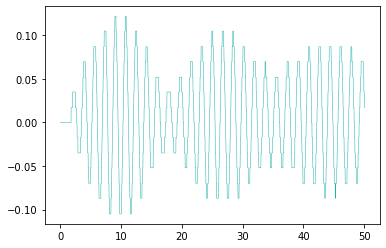

In [33]:
t_origin = np.array(df.iloc[:, 0])
phi_origin = np.array(df.iloc[:, 1])
plt.plot(t_origin, phi_origin, linewidth=0.5, color='lightseagreen')

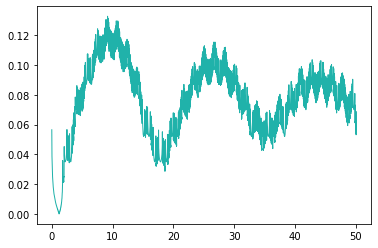

In [34]:
ha = hilbert(phi_origin)
phi_env = np.sqrt(phi_origin**2 + ha**2)
plt.plot(t_origin, phi_env, color='lightseagreen', linewidth=1, label="Hilbert transform")

0.060791584912287484 0.033135999676475666


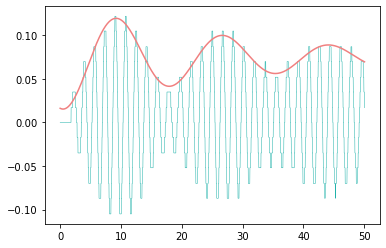

In [35]:
def env(t, A1, bt, omg, A4, A5):
    return A1 * np.exp(-bt*t) * np.cos(omg*t + A4) + A5

popt, pcov = curve_fit(env, t_origin, phi_env)

t_dense = np.linspace(t_origin.min(), t_origin.max(), 10000)

phivals = env(t_dense, popt[0], popt[1], popt[2], popt[3], popt[4])
omega = popt[2]
beta = popt[1]
plt.plot(t_origin, phi_origin, color='lightseagreen',linewidth=0.5)
plt.plot(t_dense, phivals, color='lightcoral')

a = popt[0]
beta = popt[1]
print(a,beta)

Text(0.5, 0.05, 'Fig. 4.2 Damped vibration of the Bohr pendulum.\n Damp=3V Drive=13V Frequency=0.625Hz')

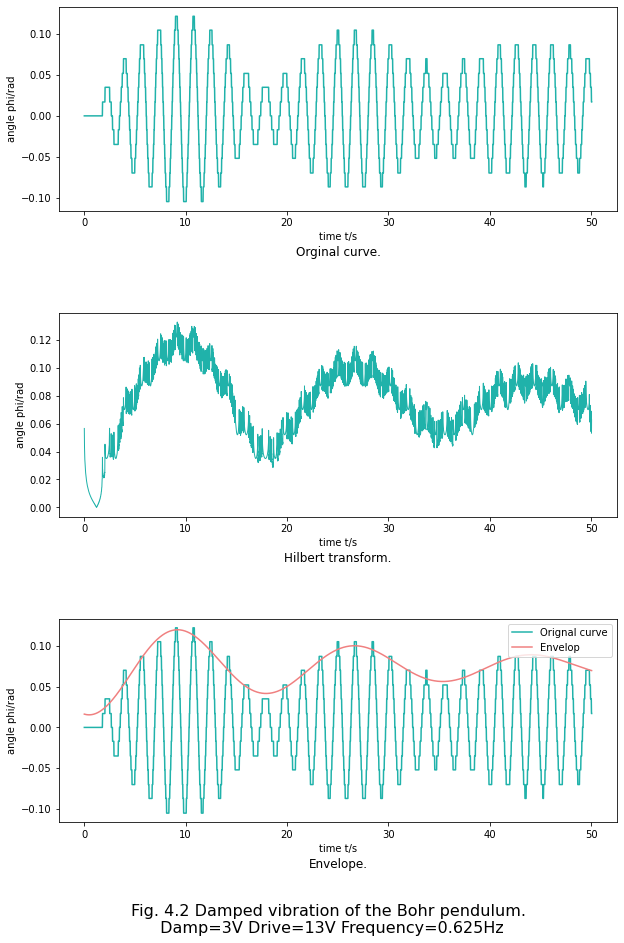

In [36]:

fig, ax =  plt.subplots(3,1,figsize=(10, 15))

ax[0].plot(t_origin, phi_origin, color='lightseagreen')
ax[0].set_xlabel('time t/s')
ax[0].set_ylabel('angle phi/rad')
ax[0].set_title('Orginal curve.', y=-0.25)


ax[1].plot(t_origin, phi_env, color='lightseagreen', linewidth=1)
ax[1].set_xlabel('time t/s')
ax[1].set_ylabel('angle phi/rad')
ax[1].set_title('Hilbert transform.', y=-0.25)


ax[2].plot(t_origin, phi_origin, color='lightseagreen', label='Orignal curve')
ax[2].plot(t_dense, phivals, color='lightcoral', label='Envelop')
# ax[2].plot(t_origin, phi_env, color='lightcoral', label='Envelop')
ax[2].set_xlabel('time t/s')
ax[2].set_ylabel('angle phi/rad')
ax[2].set_title('Envelope.', y=-0.25)
ax[2].legend(loc='upper right')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plt.suptitle('Fig. 4.{} Damped vibration of the Bohr pendulum.\n Damp={}V Drive={}V Frequency={}Hz'.format(2, 3, 13, 1000/1600), y=0.05, fontsize=16)
